In [45]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

FIXED_RANDOMNESS = False

def VasicekSingleInterestRatePath(
    R_0: float, alpha: float, beta: float, 
    sigma: float, T: float, N: int, rng: np.random.Generator
):
    delta = T / N
    t = np.linspace(0, T, N + 1)
    Z = rng.normal(loc=0, scale=1, size=N)
    dW = np.sqrt(delta) * Z
    
    R = np.empty(N + 1, dtype=np.float64)
    R[0] = R_0

    integral_term = 0.0
    for i in range(1, N + 1):
        exp_term = np.exp(-alpha * t[i])
        integral_term += np.exp(alpha * t[i-1]) * dW[i-1]
        R[i] = R_0 * exp_term + beta * (1 - exp_term) + sigma * exp_term * integral_term

    return R

In [46]:
# Parameters
R_0 = 0.05
alpha = 0.1  # Mean reversion speed
beta = 0.03  # Long-term mean level
sigma = 0.02  # Volatility
T = 1.0
N = 252
rng = np.random.default_rng(seed=42)

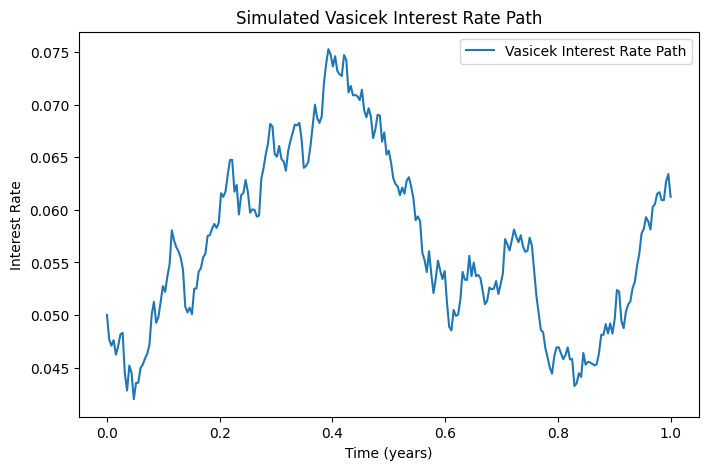

In [56]:
vasicek_path = VasicekSingleInterestRatePath(R_0, alpha, beta, sigma, T, N, rng)

# Plot the Vasicek interest rate path
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0, T, N + 1), vasicek_path, label="Vasicek Interest Rate Path")
plt.xlabel("Time (years)")
plt.ylabel("Interest Rate")
plt.title("Simulated Vasicek Interest Rate Path")
plt.legend()
plt.show()